<a href="https://colab.research.google.com/github/brendampa/Validacao-Metricas_Machine_Learning/blob/main/Valida%C3%A7%C3%A3o_M%C3%A9tricas_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/brendampa/Validacao-Metricas_Machine_Learning/refs/heads/main/emp_automovel.csv')

In [3]:
dados.head()
#Base já está tratada!

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      54025 non-null  float64
 1   anuidade_emprestimo  54025 non-null  float64
 2   anos_casa_propria    54025 non-null  float64
 3   telefone_trab        54025 non-null  int64  
 4   avaliacao_cidade     54025 non-null  float64
 5   score_1              54025 non-null  float64
 6   score_2              54025 non-null  float64
 7   score_3              54025 non-null  float64
 8   score_social         54025 non-null  float64
 9   troca_telefone       54025 non-null  float64
 10  inadimplente         54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


##Separando as variáveis explicativas e a variável alvo

In [5]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

##Modelo Árvore de Decisão

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
#Ajustar o modelo aos dados nas variáveis x e y!

modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [8]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


O resultado será a acurácia do acerto. Como deu 100% o modelo não está errando nada! Porém esse resultado está errado, pois utilizamos os dados de treino para verificar o desempenho e não de teste. Ou seja, os mesmos dados que o modelo utilizou para se ajustar.

#Separação de dados - Treino, Validação e Teste

##Separando treino+validação e teste

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify = y, random_state=5 ) #15% ficará para teste
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state=5 )

## Acurácia do modelo

In [11]:
#ajustar o modelo nos dados de treino e depois testar com dados de teste, treino e validação
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia teste: {modelo.score(x_teste, y_teste)}')
print(f'Acurácia validação: {modelo.score(x_val, y_val)}') #Dados que o modelo não viu no momento do treinamento

Acurácia treino: 1.0
Acurácia teste: 0.8492102665350444
Acurácia validação: 0.8495775629300584


Teve uma queda grande de 100% (treino) para 84% (validação) no desempenho. Para tentar melhorar, ou seja, o modelo realmente aprender e não decorar, iremos utilizar o parâmetro max_depth

In [12]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia teste: {modelo.score(x_teste, y_teste)}')
print(f'Acurácia validação: {modelo.score(x_val, y_val)}')

Acurácia treino: 0.9205865272938444
Acurácia teste: 0.9065893385982231
Acurácia validação: 0.9061057399181256


A acurácia melhorou significamente pois não teve um grande queda!

##Matriz de confusão

Avalia a quantidade de clientes avaliados como inadimplentes e como adimplentes. Compara o resultado das previsões do modelo com o resultado real.

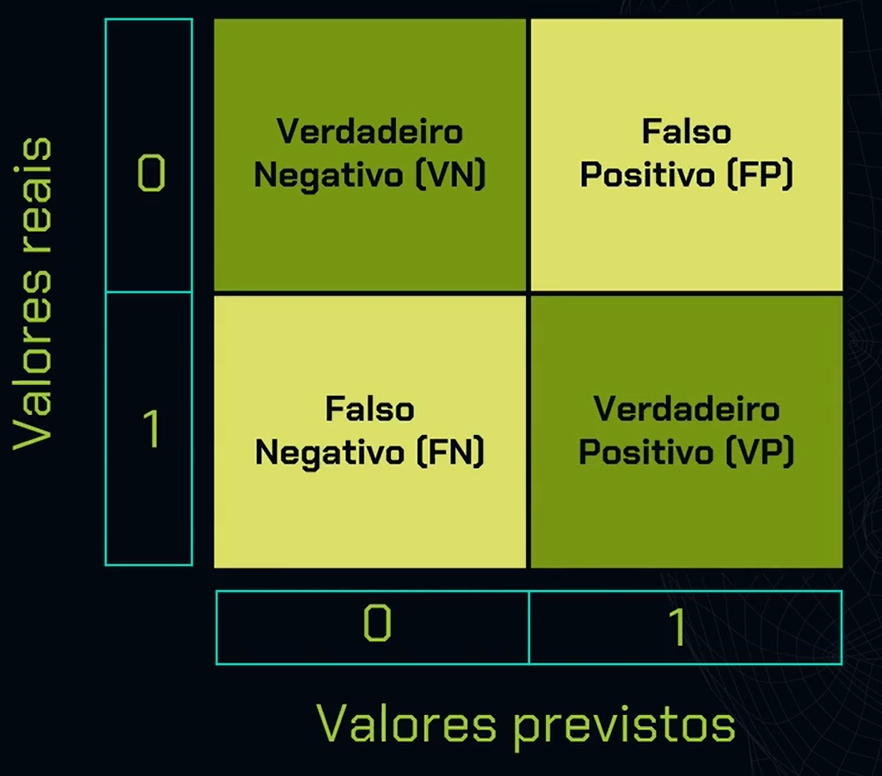

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
#Armazena a previsão para posterior comparação com dados reais (validação)
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10361   118]
 [  960    42]]


In [15]:
#Melhorando a visualização da matriz
from sklearn.metrics import ConfusionMatrixDisplay

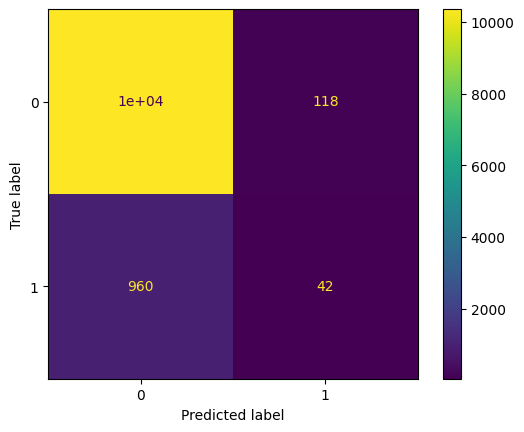

In [16]:
visualizacao = ConfusionMatrixDisplay(matriz_confusao)
visualizacao.plot();

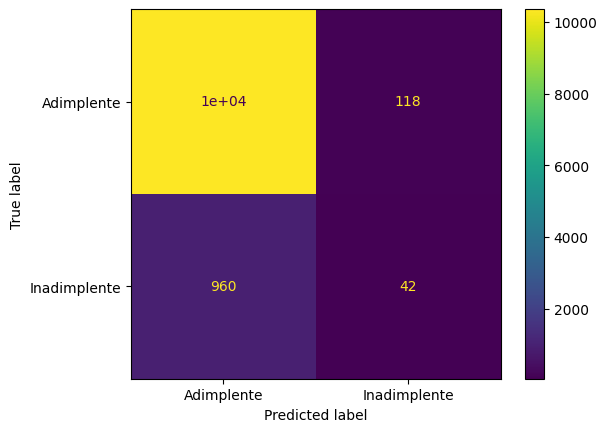

In [17]:
#Alterando as legendas para facilitar o entendimento
visualizacao = ConfusionMatrixDisplay(matriz_confusao, display_labels =['Adimplente','Inadimplente'])
visualizacao.plot();

O modelo errou em 960 + 126 clientes e acertou em 42 + 10353. Ou seja, não está tão assertivo pois errou muito a quantidade de inadimplentes.

###Acurácia Geral com a Matriz de Confusão

Cálculo olhando para a Matriz de confusão: (soma verdadeiros positivos+verdadeiros negativos) / (Soma de todas as previsões - verdadeiros positivos+verdadeiros negativos+falsos positivos+falsos negativos)

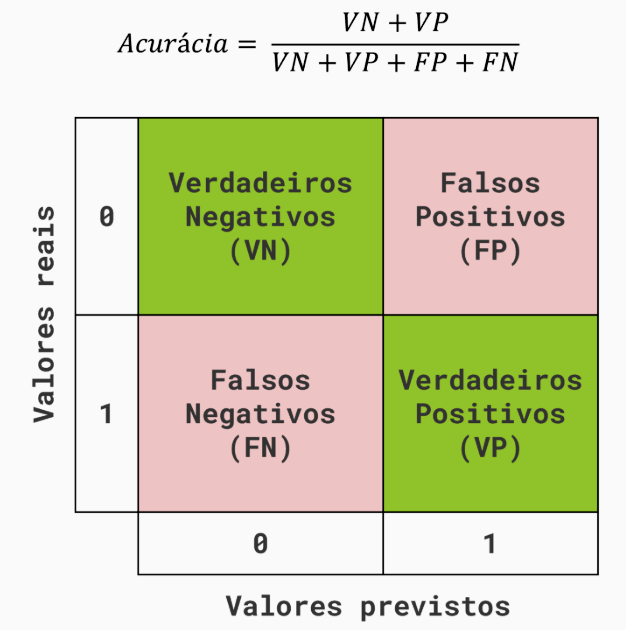

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9061057399181256


###Precisão - Indicador com a Matriz de Confusão


Cálculo: Verdadeiros positivos / soma da segunda coluna (falso positivo+verdadeiro positivo).
Valor de 0 a 1, quanto mais próximo de 1 melhor.

Mede a proporção de dados classificados como positivos que são realmente positivos, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados negativos como positivos. É usada quando o risco ou custo de classificar falsos positivos é alto, por exemplo em casos de seleção de ações no mercado financeiro, onde o importante é selecionar ações que tenham grande probabilidade de retorno, abaixando a quantidade de ações ruins (falsos positivos) mesmo que outras boas ações não tenham sido detectadas pelo modelo (falso negativo). A precisão também é importante no exemplo de detecção de doenças, onde queremos evitar que pacientes saudáveis sejam erroneamente classificados como doentes.

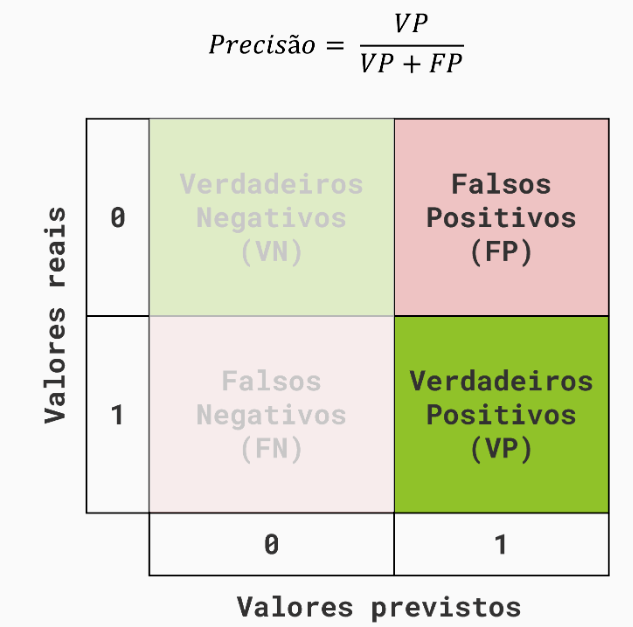

In [20]:
from sklearn.metrics import precision_score, recall_score

In [21]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')

Precisão: 0.2625


###Recall -  Indicador com a Matriz de Confusão

Cálculo: Verdadeiros positivos / soma da segunda linha (falso negativos+verdadeiro positivo).

Mede a proporção de dados positivos que foram corretamente identificados pelo modelo, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados positivos como negativos. É usada quando o risco ou custo de classificar falsos negativos é alto. Por exemplo, em casos de diagnóstico de doenças graves, em que é fundamental detectar corretamente a presença da doença.

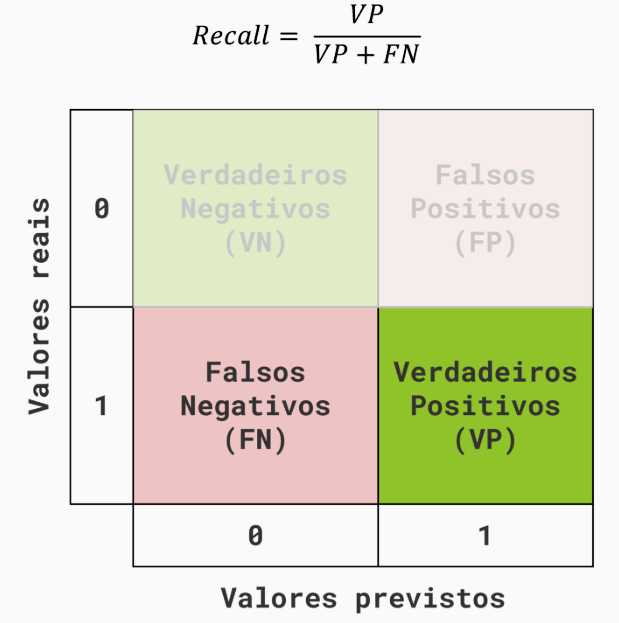

In [22]:
print(f'Recall: {recall_score(y_val, y_previsto)}')

Recall: 0.041916167664670656


O modelo não está bom por que os indicadores estão muito próimos de 0.

Precisão: quanto melhor, menos clientes serão perdidos;

Recall: quanto melhor, menor o prejuízo. É o indicador mais relevante!


### F1-score

Equilíbrio entre precisão e recall:

Cálculo:

2*precisão*recall/precsão+recall.

Fornece um equilíbrio entre o recall e a precisão, sendo útil quando as classes da variável alvo estão desbalanceadas, ou seja, quando há uma quantidade de dados muito diferente para cada classe. Além disso, é aplicável quando o risco ou custo de falsos positivos e de falsos negativos é alto simultaneamente. Em casos de detecção de tumores em pacientes, é preciso ter um equilíbrio entre evitar erros na detecção de tumores quando a pessoa realmente os possui e evitar erros ao informar que uma pessoa possui um tumor quando na realidade ela não possui.

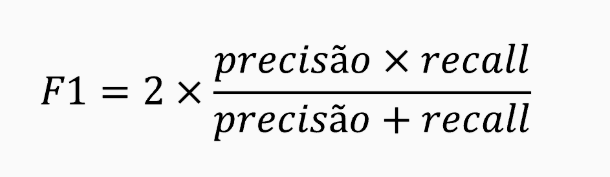

In [23]:
from sklearn.metrics import f1_score

In [24]:
print(f'F1-Score: {f1_score(y_val,y_previsto)}')

F1-Score: 0.07228915662650602


Valor baixo por que Recall e Precisão estão baixas.

###Curva ROC

Quando mais se aproxima de uma linha diagonal, pior. Quando mais próximo do ponto (0,1) melhor.
V
efifica se o modelo diferencia bem os clientes 0 e 1, no caso inadimplentes e adimplentes.

In [25]:
from sklearn.metrics import RocCurveDisplay

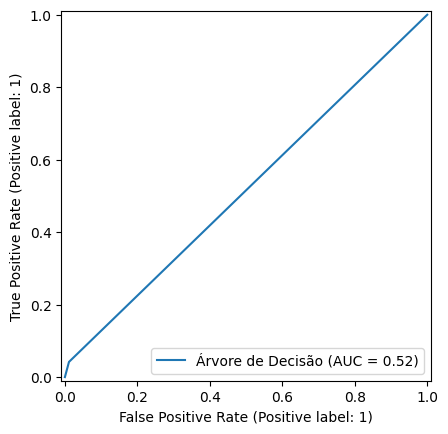

In [26]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão');

In [27]:
#Extraindo a métrica área abaixo da curva (AUC) - quanto mais próximo de 0,5 pior

from sklearn.metrics import roc_auc_score

In [28]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5153277755968168


###Curva de Precisão x Recall

Em casos de base desbalanceada, esse curva é mrlhoe do que a ROC!


In [29]:
from sklearn.metrics import PrecisionRecallDisplay

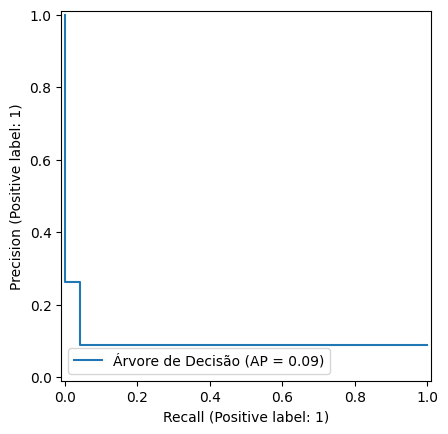

In [30]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão');

Quanto mais próximo do ponto (1,1) melhor e quanto mais próximo de (0,0) pior.Nesse caso está ruim, pois está próximo de 0,0.

A métrica AP quanto mais próximo de 0 pior e quanto mais próximo de 1 melhor.

In [31]:
#Extraindo a métrica AP
from sklearn.metrics import average_precision_score

In [32]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09461940373238367


###Resumo de Desempenho

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



Existe um desequilíbrio entre os dados de 0 e 1, conforme tabela acima.Vamos utilizar a validação cruzada para mitigar esse problema.

##Validação Cruzada

###Acurácia com avaliação cruzada

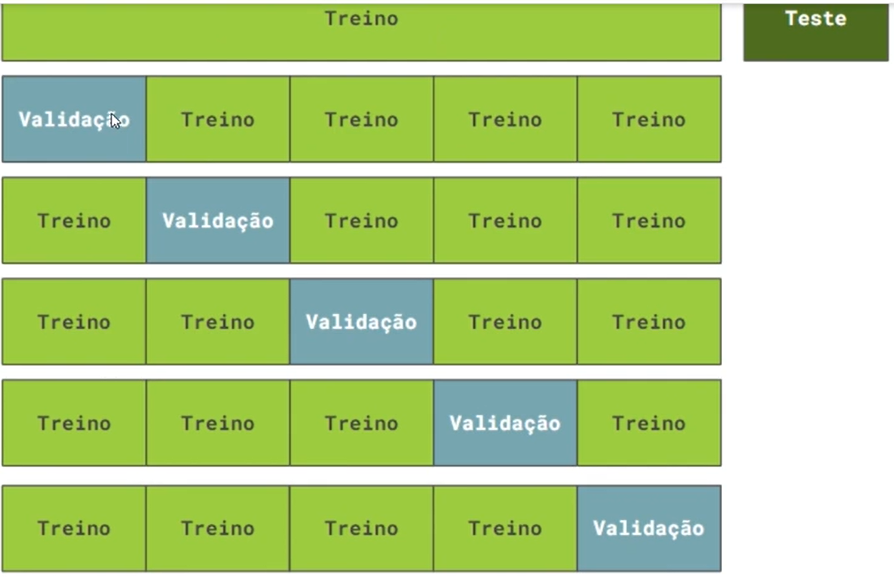

In [35]:
from sklearn.model_selection import cross_validate, KFold

In [36]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.81768441, 0.86453652, 0.75381064, 0.63758302, 0.44365168]),
 'score_time': array([0.01510644, 0.00892687, 0.00519466, 0.01681161, 0.00538969]),
 'test_score': array([0.91344584, 0.90788328, 0.90712108, 0.91332753, 0.89960801])}

In [37]:
cv_resultados['test_score']

array([0.91344584, 0.90788328, 0.90712108, 0.91332753, 0.89960801])

In [38]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança/acurácia: [{media - 2*desvio_padrao}, {min(media+2*desvio_padrao, 1)}]')

Intervalo de confiança/acurácia: [0.8981236378618, 0.9184306545669627]


###Recall com avaliação cruzada

In [39]:
def intervalo_conf(resultados):
  media = resultados['test_score'].mean()
  desvio_padrao = resultados['test_score'].std()
  print(f'Intervalo de confiança/Recall: [{media - 2*desvio_padrao}, {min(media+2*desvio_padrao, 1)}]')

In [40]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.55166173, 0.51452279, 0.37535429, 0.3974781 , 0.34005117]),
 'score_time': array([0.01242566, 0.00936913, 0.00931573, 0.00963616, 0.00638247]),
 'test_score': array([0.02774108, 0.02227723, 0.0196802 , 0.01436031, 0.02427746])}

In [41]:
intervalo_conf(cv_resultados)

Intervalo de confiança/Recall: [0.012659862769436418, 0.030674648315089863]


####Estratificando os dados

In [42]:
dados['inadimplente'].value_counts(normalize=True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [43]:
#Para garantir a proporcionalidade:
from sklearn.model_selection import StratifiedKFold

In [44]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')

In [45]:
intervalo_conf(cv_resultados)

Intervalo de confiança/Recall: [0.013914506857043533, 0.029936719386223]


#Balanceamento de Dados

Estratégias para melhorar o modelo

##Oversampling

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x,y)

In [48]:
y_balanceado.value_counts(normalize=True)

,proportion
inadimplente,
0,0.5
1,0.5


In [49]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv = skf, scoring = 'recall')

In [50]:
intervalo_conf(cv_resultados)

Intervalo de confiança/Recall: [0.6938121232148593, 0.7639564522386448]


#Pipeline para Validação

In [51]:
from imblearn.pipeline import Pipeline as imbpipeline

In [52]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline(steps=[('smote', SMOTE()), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [53]:
intervalo_conf(cv_resultados)

Intervalo de confiança/Recall: [0.21399597166216994, 0.2893704562132103]


##Undersampling

In [54]:
from imblearn.under_sampling import NearMiss

In [55]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline(steps=[('undersample', NearMiss(version = 3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [56]:
intervalo_conf(cv_resultados)

Intervalo de confiança/Recall: [0.6280742348621586, 0.6929390870141743]


##Testando o modelo - Dados de teste

In [58]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x,y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



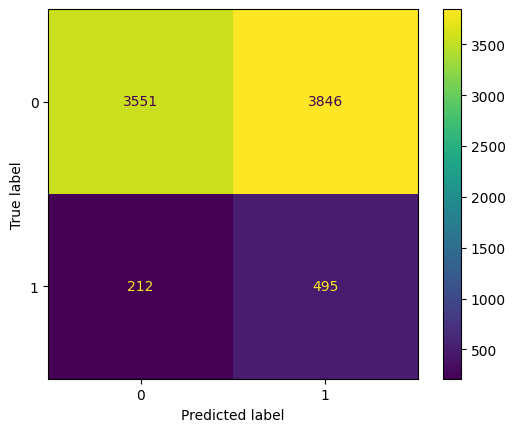

In [60]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);